In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load test data
test_df = pd.read_csv(r"C:\Users\sagar\OneDrive\Desktop\Sem 3\Deep Learning\Project 3\to_Transformer_test")

In [3]:
test_df

,Unnamed: 0.1,Unnamed: 0,text,source,label,sentences,predictions,probabilities
0,0,0,I have done the IELTS test. I would like to sh...,Human,0,"['i have done the ielts test', ' i would like ...",0,0.001694
1,1,1,The marriage of Richard II of England to Anne ...,Human,0,['the marriage of richard ii of england to ann...,0,0.336719
2,2,2,Women From the Downtown Eastside: Gender Inequ...,Human,0,['women from the downtown eastside: gender ine...,0,0.000919
3,3,3,Women’s Health. Sexually Transmitted Diseases ...,Human,0,"['women’s health', ' sexually transmitted dise...",0,0.000295
4,4,4,“A Primer on Corporate Governance” by Kluyver ...,Human,0,['“a primer on corporate governance” by kluyve...,0,0.002244
...,...,...,...,...,...,...,...,...
995,995,995,The cybersecurity community is abuzz with the ...,GPT-3.5,1,['the cybersecurity community is abuzz with th...,1,0.999907
996,996,996,"As a language model AI, I cannot agree or disa...",GPT-3.5,1,"['as a language model ai, i cannot agree or di...",1,0.998958
997,997,997,The night was falling on the western hemispher...,GPT-3.5,1,['the night was falling on the western hemisph...,1,0.999971
998,998,998,The Pirate Bay (TPB) has been able to continue...,GPT-3.5,1,['the pirate bay (tpb) has been able to contin...,1,0.937829


In [4]:

from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, TrainingArguments, Trainer

In [5]:
# Load the tokenizer and model
model_path = './saved_model_GPT2_Venkat_final'  # Adjust to where your model is saved
model = GPT2ForSequenceClassification.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
model.eval()



# Assuming new_df is your DataFrame and it has 'sentences' and 'generated' as columns


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

In [6]:
test = test_df['sentences'].tolist()

In [7]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments


In [8]:
# Initialize the tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set padding token if it's not already defined
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# # Now tokenize the flat list of sentences
# inputs = tokenizer(test, truncation=True, padding="max_length", max_length=512, return_tensors="pt")


In [9]:

from tqdm import tqdm
#device = torch.device("cuda")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

In [10]:
device

device(type='cuda')

In [26]:
predictions = []
probabilities = []


for index, row in tqdm(test_df.iterrows()):
    input_ids = tokenizer(row['sentences'], truncation=True, padding="max_length", max_length=512, return_tensors="pt")
    
    # Move input_ids tensor to the same device as the model
    input_ids = {key: value.to(device) for key, value in input_ids.items()}

    true_label = torch.tensor(row['label']).to(device)
    
    with torch.no_grad():
        outputs = model(**input_ids)
        logits = outputs.logits
        
        # Move logits tensor to CPU and then convert it to a NumPy array
        logits_cpu = logits.to('cpu')
        probs = torch.nn.functional.softmax(logits_cpu, dim=-1).numpy()
        
        # Deallocate GPU memory
        del logits, logits_cpu
        
        predictions.append(probs.argmax(axis=-1)[0])
        probabilities.append(probs[0, 1])  # Storing the probability of the positive class
        
        

1000it [00:18, 54.68it/s]


In [27]:
# Store predictions in the DataFrame
test_df['predictions'] = predictions
test_df['probabilities'] = probabilities

In [28]:
actual_labels = test_df['label'].values
accuracy = accuracy_score(actual_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9740


In [29]:
from sklearn.metrics import confusion_matrix, f1_score
f1score = f1_score(test_df['label'].values, test_df['predictions'], average='weighted')
print(f1score)

0.9739998959995839


In [31]:
from sklearn.metrics import log_loss
import numpy as np
# Assuming test_df['predictions'] and test_df['label'] are NumPy arrays or lists
predictions = test_df['predictions']  # Predicted probabilities
labels = test_df['label']  # True labels

# Ensure predictions are probabilities between 0 and 1
predictions = np.clip(predictions, 1e-15, 1 - 1e-15)

# Calculate binary cross-entropy loss
binary_cross_entropy_loss = log_loss(labels, predictions)

print("Binary Cross-Entropy Loss:", binary_cross_entropy_loss)

Binary Cross-Entropy Loss: 0.9371349881170461


C:\Users\sagar\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
C:\Users\sagar\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*

In [34]:
predictions

0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: predictions, Length: 1000, dtype: int64

C:\Users\sagar\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
C:\Users\sagar\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*

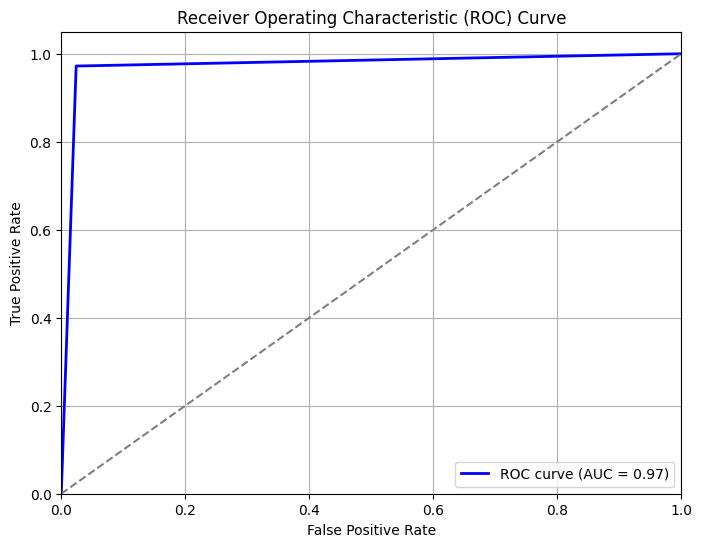

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming test_df['predictions'] and test_df['label'] are NumPy arrays or lists
predictions = test_df['predictions']  # Predicted probabilities
labels = test_df['label']  # True labels

# Ensure predictions are probabilities between 0 and 1
predictions = np.clip(predictions, 1e-15, 1 - 1e-15)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(labels, predictions)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(labels, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
